In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-consumer-finance-complaints/database.sqlite
/kaggle/input/us-consumer-finance-complaints/consumer_complaints.csv
/kaggle/input/cfpb-complaints/complaints.csv


In [2]:
import pickle
import torch

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

In [4]:
# # Load CSV file
df1= pd.read_csv(r'../input/us-consumer-finance-complaints/consumer_complaints.csv')
# This step is not executable because the .csv file is not in the drive
df2= pd.read_csv(r'../input/cfpb-complaints/complaints.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# Column Cleaning First. Columns are super nastily named
df2.rename(columns={'Date received':'DATE_RECEIVED',
                  'Product':'PRODUCT',
                  'Sub-product':'SUB_PRODUCT',
                  'Issue':'ISSUE',
                  'Sub-issue':'SUB_ISSUE',
                  'Consumer complaint narrative':'CONSUMER_COMPLAINT_NARRATIVE',
                  'Company public response':'COMPANY_PUBLIC_RESPONSE',
                   'Company':'COMPANY',
                   'State':'STATE',
                   'ZIP code':'ZIP_CODE',
                   'Tags':'TAGS',
                   'Consumer consent provided?':'CONSUMER_CONSENT_PROVIDED',
                   'Subbmited via':'SUBMITTED_VIA',
                   'Date sent to company':'DATE_SENT_TO_COMPANY',
                   'Company response to consumer':'COMPANY_RESPONSE_TO_CONSUMER',
                   'Timely response?':'TIMELY_RESPONSE',
                   'Consumer disputed?':'CONSUMER_DISPUTED',
                   'Complaint ID':'COMPLAINT_ID'
                  }, inplace=True)

                  # Column Cleaning First. Columns are super nastily named
df1.rename(columns={'date_received':'DATE_RECEIVED',
                  'product':'PRODUCT',
                  'sub_product':'SUB_PRODUCT',
                  'issue':'ISSUE',
                  'sub_issue':'SUB_ISSUE',
                  'consumer_complaint_narrative':'CONSUMER_COMPLAINT_NARRATIVE',
                  'company_public_response':'COMPANY_PUBLIC_RESPONSE',
                   'company':'COMPANY',
                   'state':'STATE',
                   'zipcode':'ZIP_CODE',
                   'tags':'TAGS',
                   'consumer_consent_provided':'CONSUMER_CONSENT_PROVIDED',
                   'submitted_via':'SUBMITTED_VIA',
                   'date_sent_to_company':'DATE_SENT_TO_COMPANY',
                   'company_response_to_consumer':'COMPANY_RESPONSE_TO_CONSUMER',
                   'timely_response':'TIMELY_RESPONSE',
                   'consumer_disputed?':'CONSUMER_DISPUTED',
                   'complaint_id':'COMPLAINT_ID'
                  }, inplace=True)

In [6]:
print(df1.shape)
print(df2.shape)
frames = [df1, df2]
df = pd.concat(frames)
print(df.info())

(555957, 18)
(1835193, 18)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2391150 entries, 0 to 1835192
Data columns (total 19 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   DATE_RECEIVED                 object
 1   PRODUCT                       object
 2   SUB_PRODUCT                   object
 3   ISSUE                         object
 4   SUB_ISSUE                     object
 5   CONSUMER_COMPLAINT_NARRATIVE  object
 6   COMPANY_PUBLIC_RESPONSE       object
 7   COMPANY                       object
 8   STATE                         object
 9   ZIP_CODE                      object
 10  TAGS                          object
 11  CONSUMER_CONSENT_PROVIDED     object
 12  SUBMITTED_VIA                 object
 13  DATE_SENT_TO_COMPANY          object
 14  COMPANY_RESPONSE_TO_CONSUMER  object
 15  TIMELY_RESPONSE               object
 16  CONSUMER_DISPUTED             object
 17  COMPLAINT_ID                  int64 
 18  Submitted via  

In [7]:
df.head(5)

,DATE_RECEIVED,PRODUCT,SUB_PRODUCT,ISSUE,SUB_ISSUE,CONSUMER_COMPLAINT_NARRATIVE,COMPANY_PUBLIC_RESPONSE,COMPANY,STATE,ZIP_CODE,TAGS,CONSUMER_CONSENT_PROVIDED,SUBMITTED_VIA,DATE_SENT_TO_COMPANY,COMPANY_RESPONSE_TO_CONSUMER,TIMELY_RESPONSE,CONSUMER_DISPUTED,COMPLAINT_ID,Submitted via
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074,NaN
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080,NaN
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473,NaN
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326,NaN
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067,NaN


In [8]:
df.rename(columns={'date_received':'DATE_RECEIVED',
                  'product':'PRODUCT',
                  'sub_product':'SUB_PRODUCT',
                  'issue':'ISSUE',
                  'sub_issue':'SUB_ISSUE',
                  'consumer_complaint_narrative':'CONSUMER_COMPLAINT_NARRATIVE',
                  'company_public_response':'COMPANY_PUBLIC_RESPONSE',
                   'company':'COMPANY',
                   'state':'STATE',
                   'zipcode':'ZIP_CODE',
                   'tags':'TAGS',
                   'consumer_consent_provided':'CONSUMER_CONSENT_PROVIDED',
                   'submitted_via':'SUBMITTED_VIA',
                   'date_sent_to_company':'DATE_SENT_TO_COMPANY',
                   'company_response_to_consumer':'COMPANY_RESPONSE_TO_CONSUMER',
                   'timely_response':'TIMELY_RESPONSE',
                   'consumer_disputed?':'CONSUMER_DISPUTED',
                   'complaint_id':'COMPLAINT_ID'
                  }, inplace=True)

In [9]:
df_complaints_issue_bkp = df
#df = df_complaints_issue_bkp
df = df[df["CONSUMER_COMPLAINT_NARRATIVE"].notnull() == True]
df = df.drop_duplicates()
print(df.shape)
df['Text_Length'] = df["CONSUMER_COMPLAINT_NARRATIVE"].str.len()
print(df.shape)
pd.DataFrame(df.groupby(['PRODUCT','ISSUE'])['Text_Length'].describe()).to_csv('Complaint_text_dist.csv')

(690816, 19)
(690816, 20)


In [10]:
# Subsetting dataframe into columns useful for our text multi-classification problem
df_product_and_complaint = df[['PRODUCT','ISSUE', 'CONSUMER_COMPLAINT_NARRATIVE']]

# Renaming columns to something easier
df_product_and_complaint.rename(columns={'CONSUMER_COMPLAINT_NARRATIVE':'CONSUMER_COMPLAINT'},inplace=True) 
df.rename(columns={'CONSUMER_COMPLAINT_NARRATIVE':'CONSUMER_COMPLAINT'},inplace=True) 

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
print(df_product_and_complaint['PRODUCT'].value_counts())

Credit reporting, credit repair services, or other personal consumer reports    218174
Debt collection                                                                 143691
Mortgage                                                                         85720
Credit card or prepaid card                                                      44984
Credit reporting                                                                 44114
Student loan                                                                     29292
Credit card                                                                      26767
Checking or savings account                                                      26195
Bank account or service                                                          20596
Consumer Loan                                                                    13151
Money transfer, virtual currency, or money service                               11511
Vehicle loan or lease                      

In [12]:
## Combining Loans together to make this a simplier classification problem
df_product_and_complaint.replace('Student loan', 'Loan', inplace=True)
df_product_and_complaint.replace('Consumer Loan', 'Loan', inplace=True)
df_product_and_complaint.replace('Payday loan', 'Loan', inplace=True)
df_product_and_complaint.replace('Vehicle loan or lease', 'Loan', inplace=True)
df_product_and_complaint.replace('Credit card or prepaid card', 'Credit card', inplace=True)
df_product_and_complaint.replace('Payday loan, title loan, or personal loan', 'Loan', inplace=True)
df_product_and_complaint.replace('Money transfer, virtual currency, or money service', 'Money transfers', inplace=True)
# Placing Virtual currency into other financial service
df_product_and_complaint.replace('Virtual currency', 'Other financial service', inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4385: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [13]:
# Dropping rows with the aggregated columns
df_product_and_complaint.drop(
    df_product_and_complaint[
    df_product_and_complaint.PRODUCT == 
    'Credit reporting, credit repair services, or other personal consumer reports'].index, 
    inplace=True) # credit_aggregated

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
# Applying encoding to the ISSUE column
df_product_and_complaint['PRODUCT_ID'] = df_product_and_complaint['PRODUCT'].factorize()[0] 

#.factorize[0] arranges the index of each encoded number accordingly to the 
# index of your categorical variables in the ISSUE column


# Creates a dataframe of the ISSUE to their respective PRODUCT_ID
category_id_df = df_product_and_complaint[['PRODUCT', 'PRODUCT_ID']].drop_duplicates()


# Dictionaries for future use. Creating our cheatsheets for what each encoded label represents.
category_to_id = dict(category_id_df.values) # Creates a ISSUE: PRODUCT_ID key-value pair
id_to_category = dict(category_id_df[['PRODUCT_ID', 'PRODUCT']].values)  # Creates a PRODUCT_ID: ISSUE key-value pair

# New dataframe
df_product_and_complaint.head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PRODUCT,ISSUE,CONSUMER_COMPLAINT,PRODUCT_ID
190126,Debt collection,Cont'd attempts collect debt not owed,XXXX has claimed I owe them {$27.00} for XXXX ...,0
190135,Loan,Managing the loan or lease,Due to inconsistencies in the amount owed that...,1
190155,Mortgage,"Loan modification,collection,foreclosure",In XX/XX/XXXX my wages that I earned at my job...,2
190207,Mortgage,"Loan servicing, payments, escrow account",I have an open and current mortgage with Chase...,2
190237,Mortgage,"Loan servicing, payments, escrow account",Experian is reporting my OPEN and CURRENT Mort...,2
190238,Mortgage,"Loan modification,collection,foreclosure",This complaint is against Wells Fargo Bank for...,2
190251,Mortgage,"Loan servicing, payments, escrow account",I spoke to XXXX of green tree representatives ...,2
190263,Credit card,Other,i opened XXXX Bank of America credit cards 15-...,3
190264,Loan,Taking out the loan or lease,I applied for a loan with XXXX XXXX and had pu...,1
190303,Mortgage,"Application, originator, mortgage broker",I am very disappointed that the CFPB did not h...,2


In [15]:
df_product_and_complaint.groupby(['PRODUCT', 'PRODUCT_ID'])['PRODUCT_ID'].count()

PRODUCT                      PRODUCT_ID
Bank account or service      5              19386
Checking or savings account  9              26195
Credit card                  3              70060
Credit reporting             4              41404
Debt collection              0             139993
Loan                         1              62830
Money transfers              6              13537
Mortgage                     2              82530
Other financial service      7                390
Prepaid card                 8               2104
Name: PRODUCT_ID, dtype: int64

In [16]:
df_comp = df_product_and_complaint[['CONSUMER_COMPLAINT','PRODUCT_ID']]
df_comp.columns  = ['text','label']
df_comp.head(5)

,text,label
190126,XXXX has claimed I owe them {$27.00} for XXXX ...,0
190135,Due to inconsistencies in the amount owed that...,1
190155,In XX/XX/XXXX my wages that I earned at my job...,2
190207,I have an open and current mortgage with Chase...,2
190237,Experian is reporting my OPEN and CURRENT Mort...,2


In [17]:
df_comp.drop_duplicates(subset=['text'],keep='first',inplace=True)
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449458 entries, 190126 to 1835192
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    449458 non-null  object
 1   label   449458 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.3+ MB


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


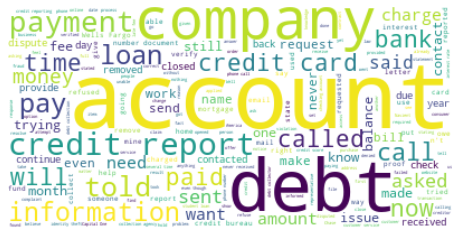

In [18]:
text = " ".join([x for x in df_comp.text if 'X' not in x ])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

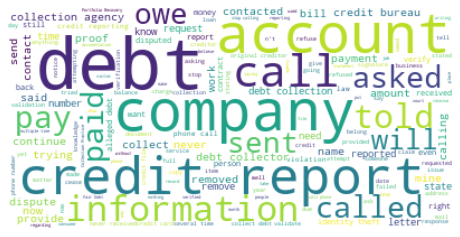

In [19]:
#product 0 - Debt collection

text = " ".join([x for x in df_comp.text[df_comp.label ==0] if 'X' not in x ])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()



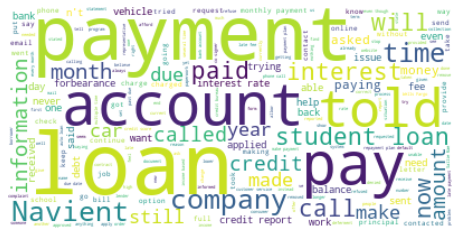

In [20]:
#product 1 - Loan

text = " ".join([x for x in df_comp.text[df_comp.label ==1] if 'X' not in x ])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()



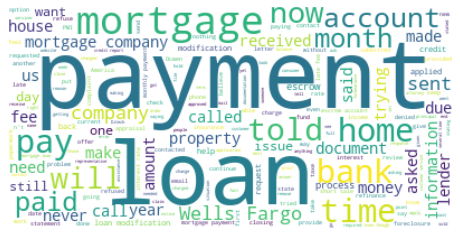

In [21]:
#product 2  - Mortgage

text = " ".join([x for x in df_comp.text[df_comp.label ==2] if 'X' not in x ])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()



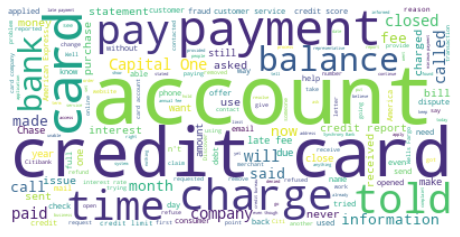

In [22]:
#product 3 - Credit card

text = " ".join([x for x in df_comp.text[df_comp.label ==3] if 'X' not in x ])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()



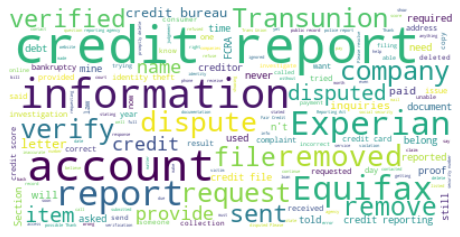

In [23]:
#product 4 Credit reporting

text = " ".join([x for x in df_comp.text[df_comp.label ==4] if 'X' not in x ])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()



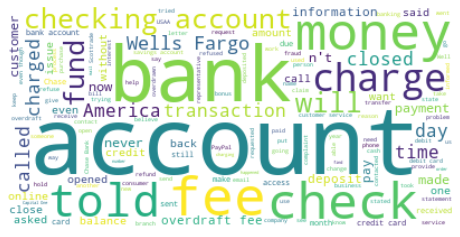

In [24]:
#product 5 Credit reporting

text = " ".join([x for x in df_comp.text[df_comp.label ==5] if 'X' not in x ])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()



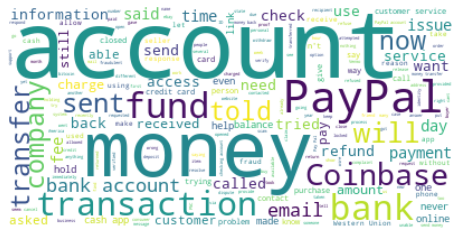

In [25]:
#product 6 Money transfers

text = " ".join([x for x in df_comp.text[df_comp.label ==6] if 'X' not in x ])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

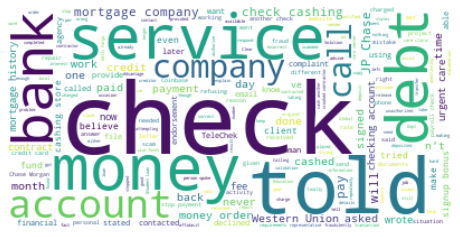

In [26]:
#product 7 Other financial service

text = " ".join([x for x in df_comp.text[df_comp.label ==7] if 'X' not in x ])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

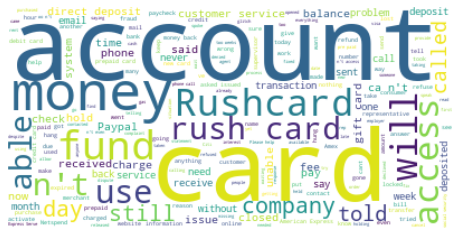

In [27]:
#product 8 Prepaid card

text = " ".join([x for x in df_comp.text[df_comp.label ==8] if 'X' not in x ])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
df_comp_orig = df_comp.copy()

In [29]:
df_comp_orig.head()

,text,label
190126,XXXX has claimed I owe them {$27.00} for XXXX ...,0
190135,Due to inconsistencies in the amount owed that...,1
190155,In XX/XX/XXXX my wages that I earned at my job...,2
190207,I have an open and current mortgage with Chase...,2
190237,Experian is reporting my OPEN and CURRENT Mort...,2


In [30]:
#df_comp = df_comp_orig.sample(frac= 0.05)

# Reducing dataframe to 30k entries
# Need to reduce all categories by 80%

percentage_reduction_1 = 0.95
percentage_reduction_2 = 0.0

# Debt Collection Reduction
df_product_and_complaint_reduced = \
df_product_and_complaint.drop(
  df_product_and_complaint[df_product_and_complaint['PRODUCT'] == 'Debt collection'].sample(frac=percentage_reduction_1).index)

# Mortgage Reduction
df_product_and_complaint_reduced = \
df_product_and_complaint_reduced.drop(
  df_product_and_complaint_reduced[
      df_product_and_complaint_reduced['PRODUCT'] == 'Mortgage'].sample(frac=percentage_reduction_1).index)

# Loan
df_product_and_complaint_reduced = \
df_product_and_complaint_reduced.drop(
  df_product_and_complaint_reduced[
      df_product_and_complaint_reduced['PRODUCT'] == 'Loan'].sample(frac=percentage_reduction_1).index)

# Credit reporting
df_product_and_complaint_reduced = \
df_product_and_complaint_reduced.drop(
  df_product_and_complaint_reduced[
      df_product_and_complaint_reduced['PRODUCT'] == 'Credit reporting'].sample(frac=percentage_reduction_1).index)

# Credit card
df_product_and_complaint_reduced = \
df_product_and_complaint_reduced.drop(
  df_product_and_complaint_reduced[
      df_product_and_complaint_reduced['PRODUCT'] == 'Credit card'].sample(frac=percentage_reduction_1).index)

# Checking or savings account
df_product_and_complaint_reduced = \
df_product_and_complaint_reduced.drop(
  df_product_and_complaint_reduced[
      df_product_and_complaint_reduced['PRODUCT'] == 'Checking or savings account'].sample(frac=percentage_reduction_1).index)

# Bank account or service
df_product_and_complaint_reduced = \
df_product_and_complaint_reduced.drop(
    df_product_and_complaint_reduced[
        df_product_and_complaint_reduced['PRODUCT'] == 'Bank account or service'].sample(frac=percentage_reduction_1).index)

#Money transfers (too little to be reduced)
df_product_and_complaint_reduced = \
df_product_and_complaint_reduced.drop(
    df_product_and_complaint_reduced[
        df_product_and_complaint_reduced['PRODUCT'] == 'Money transfers'].sample(frac=percentage_reduction_1).index)

# Prepaid card (too little to be reduced)
df_product_and_complaint_reduced = \
df_product_and_complaint_reduced.drop(
    df_product_and_complaint_reduced[
        df_product_and_complaint_reduced['PRODUCT'] == 'Prepaid card'].sample(frac=percentage_reduction_2).index)

# Other financial service (too little to be reduced)
df_product_and_complaint_reduced = \
df_product_and_complaint_reduced.drop(
    df_product_and_complaint_reduced[
        df_product_and_complaint_reduced['PRODUCT'] == 'Other financial service'].sample(frac=percentage_reduction_2).index)


In [31]:
del df,df_comp,df_product_and_complaint

In [32]:
df_comp = df_product_and_complaint_reduced
print(df_comp.PRODUCT.value_counts())
df_comp = df_comp[['CONSUMER_COMPLAINT','PRODUCT_ID']]
df_comp.columns  = ['text','label']
print(df_comp.head(5))

Debt collection                6630
Mortgage                       3914
Credit card                    3292
Loan                           3012
Prepaid card                   1970
Credit reporting               1948
Checking or savings account    1243
Bank account or service         917
Money transfers                 635
Other financial service         364
Name: PRODUCT, dtype: int64
                                                     text  label
194491  On XXXX XXXX, XXXX I submitted documentation t...      1
196135  Paid for Credit Monitoring, XXXX, {$19.00} per...      4
196507  I started their program in XXXX of 2012. I bel...      7
196637  This debt collector calls repeatedly, 2-4 time...      0
196855  I recently sent an online secure message to Ca...      3


In [33]:
df_comp.shape

(23925, 2)

In [34]:
train_df,eval_df = train_test_split(df_comp,test_size = 0.3)

In [35]:
!pip install simpletransformers==0.32.3

     |████████████████████████████████| 187 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 43 kB 1.3 MB/s  eta 0:00:01
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16170 sha256=1e0f7541d8361eec04c9248373ca908727e8f15cb7a41b292045b8e9d0195aef
  Stored in directory: /root/.cache/pip/wheels/05/96/ee/7cac4e74f3b19e3158dce26a20a1c86b3533c43ec72a549fd7
Successfully built seqeval


In [36]:
from simpletransformers.classification import ClassificationModel
#from simpletransformers.classification import ClassificationModel, ClassificationArgs
#model_args = ClassificationArgs(num_train_epochs=1, overwrite_output_dir=True, manual_seed=300, silent=True,reprocess_input_data= True, best_model_dir='/kaggle/output/best_model', output_dir='/kaggle/output/all', save_eval_checkpoints=True, save_model_every_epoch=True, save_optimizer_and_scheduler=True)
# Create a TransformerModel
#model = ClassificationModel(model_type='bert', model_name='bert-base-cased', num_labels=9, use_cuda=False, args=model_args)
model = ClassificationModel('bert', 'bert-base-cased', num_labels=10, args={'reprocess_input_data': True, 'overwrite_output_dir': True},use_cuda=False)


wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [37]:
train_df2 = pd.DataFrame({
    'text': train_df['text'].replace(r'\n', ' ', regex=True),
    'label': train_df['label']
})

eval_df2 = pd.DataFrame({
    'text': eval_df['text'].replace(r'\n', ' ', regex=True),
    'label': eval_df['label']
})

In [38]:
train_df2['label'].value_counts()

0    4667
2    2723
3    2292
1    2116
4    1364
8    1359
9     893
5     633
6     445
7     255
Name: label, dtype: int64

In [39]:
eval_df2['label'].value_counts()

0    1963
2    1191
3    1000
1     896
8     611
4     584
9     350
5     284
6     190
7     109
Name: label, dtype: int64

In [ ]:
%%time
model.train_model(train_df2)

/opt/conda/lib/python3.7/site-packages/simpletransformers/classification/classification_model.py:263: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


Running loss: 1.998803

/opt/conda/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:231: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.913738

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df2)

In [ ]:
print(result)
print(model_outputs)
#print(wrong_predictions)

In [ ]:
lst = []
for arr in model_outputs:
    lst.append(np.argmax(arr))

In [ ]:
true = eval_df2['label'].tolist()
predicted = lst

In [ ]:
import sklearn
mat = sklearn.metrics.confusion_matrix(true , predicted)
mat

In [ ]:
product_list = ['Debt collection','Mortgage','Credit card','Loan','Credit reporting','Checking or savings account','Bank account or service','Money transfers','Prepaid card','Other financial service']

In [ ]:
print(sklearn.metrics.classification_report(true,predicted,target_names=product_list))

In [ ]:
sklearn.metrics.accuracy_score(true,predicted)

In [ ]:
def get_result(statement):
    result = model.predict([statement])
    pos = np.where(result[1][0] == np.amax(result[1][0]))
    pos = int(pos[0])
    sentiment_dict = {0:'Bank account or service',1:'Credit card',2:'Credit reporting' ,3:'Mortgage' ,4: 'Student loan'}
    print(sentiment_dict[pos])
    return

In [ ]:
get_result("Planning to get some loan for my Harvard law degree with low interest")

In [ ]:
model.save_pretrained("finalized_model")

In [ ]:
with open('finalized_model.sav', 'wb') as to_write:
    pickle.dump(model, to_write)

In [ ]:
import torch
torch.save(model, '/output')

In [ ]:
# Pickle trained Model for use in Flask App
with open('bert_finalized.pickle', 'wb') as to_write:
    pickle.dump(model, to_write)